# Visualising your data using matplotlib

There are a few options for making static figures from your data using Python:

* Pandas methods like [`DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
* [seaborn](https://seaborn.pydata.org/)
* [altair](https://altair-viz.github.io/)
* [plotnine](https://plotnine.readthedocs.io/en/stable/)
* more??

However, this notebook focuses on [matplotlib](https://matplotlib.org/). Matplotlib is old, clunky and has a comparatively steep learning curve: why learn it rather than one of the others?

* Matplotlib is the de facto default, so there is a good chance you will work on a project that uses matplotlib already or want to use another tool that assumes you use matplotlib.
* Most other plotting packages support or even require matplotlib as a backend. Learning matplotlib lets you glue such packages together.
* Matplotlib is less annoying than the alternatives for some tasks, e.g. annotations.
* Matplotlib can do pretty much anything. Useful when the reviewer/collaborator says "can you just...".


## What is matplotlib?

Matplotlib is a Python package that handles creating plots, displaying them and saving them as files. 

Matplotlib can make dynamic and interactive plots, but today we will focus on static plots.

Matplotlib is pretty old (first release 2003) and was inspired by MATLAB's plotting interface.

### Interfaces

There are two ways of interacting with matplotlib: procedural (`matplotlib.pyplot.*`) and object-oriented (`matplotlib.*`).

Pyplot commands are mostly wrappers around matplotlib commands (for example [here](https://github.com/matplotlib/matplotlib/blob/d5210e4a87665581205f5147703dbd229b44cf66/lib/matplotlib/pyplot.py#L2810-L2814) is the source code for `matplotlib.pyplot.plot`).

Having two ways of doing things is [un-pythonic](https://peps.python.org/pep-0020/#the-zen-of-python) and a big reason why matplotlib is hard to learn.

However it's not too bad if you remember that pyplot is all about making interacting with the object-oriented interface more convenient. If you want access to full functionality you usually have to use the object-oriented interface.

## Imports

These are the libraries that this notebook uses - maybe they are familiar!


In [1]:
import os 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Fetch and process data

The next two cells fetch and filter the proteomics and transcriptomics data from last session.

In [2]:
BASE_URL = "https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-30513-2/MediaObjects/" 
PROTEOME_URL = os.path.join(BASE_URL, "41467_2022_30513_MOESM4_ESM.xlsx")
TRANSCRIPTOME_URL = os.path.join(BASE_URL, "41467_2022_30513_MOESM6_ESM.xlsx")

raw_proteome_data, raw_transcriptome_data = (
    pd.read_excel(url, header=0) for url in (PROTEOME_URL, TRANSCRIPTOME_URL)
)

In [3]:
proteome_data = (
    raw_proteome_data
    .drop(columns=["Unnamed: 0", "Categories"])  # remove unwanted columns
    .dropna(how="any")                           # remove rows with any null values
)
transcriptome_data = (
    raw_transcriptome_data
    .dropna(how="any")                           # remove rows with any null values
)

# Get columns with numeric dtypes
numeric_transcriptome_columns, numeric_proteome_columns = (
    [
        c for c, dtype in df.dtypes.items() 
        if pd.api.types.is_numeric_dtype(dtype)
    ]
    for df in [transcriptome_data, proteome_data]
)

print("Proteome data:")
display(proteome_data)

print("Transcriptome data:")
display(transcriptome_data)

Proteome data:


,Majority protein IDs,Gene Name,S1,S2,S3,S4,S5,S6,S7,S8,...,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27
1,P19097,FAS2,82452.270205,79779.523009,84618.632024,118520.675453,117488.905399,117159.998068,138977.483255,144138.512881,...,91209.571471,85063.315645,93305.693602,88758.854070,78471.524958,81948.073191,72495.589492,62546.099164,56921.725042,74664.084377
2,Q00955,ACC1,80980.039401,79181.536246,83903.335061,86035.271225,79691.734225,85331.089655,67574.941552,70916.743805,...,47966.772571,50902.456412,56970.872752,53373.639893,50524.880588,51603.976968,46927.974480,40988.634801,36394.374344,48429.078610
3,P07259,URA2,39354.81494,38889.618852,40467.620523,42649.741464,41779.577050,41948.514658,50886.047984,52430.940434,...,44787.272380,42549.345866,52366.807193,44114.959866,52879.038353,53874.218583,50731.992629,44877.261859,41946.010033,59242.826490
4,P07149,FAS1,70992.082651,68074.744978,71888.271167,99290.38363,98498.151949,98328.464667,116102.009908,121262.573677,...,75095.928813,70537.897812,75996.292451,72702.279944,65449.876876,68052.050691,58567.930810,51500.342385,47162.486880,59724.931330
5,P06105,SCP160,15866.563114,15589.045692,16002.005154,17532.347516,16867.256547,16872.126352,22262.699513,23154.853437,...,25720.021228,25762.256045,28125.209247,25498.954660,30447.87284,30838.126270,30499.993751,28210.792,23627.567774,35529.349996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,P40518,ARC15,31708.831467,31754.528265,30910.760516,29859.034593,28351.805528,30040.539940,30502.872,31279.827355,...,24021.269007,22217.450557,21595.005937,21639.907856,19137.511124,20440.052188,18399.729071,16835.317038,12769.086674,19172.968525
2710,Q12117,MRH1,2505.689263,4323.401836,1537.091002,7568.31708,5647.256292,2529.910039,4737.775642,3667.693252,...,1556.232205,3353.40125,5256.131754,2472.314313,5587.356249,4299.064406,3294.366883,3668.618764,3087.112353,2574.027837
2714,Q12306,SMT3,34258.379745,35912.187721,35392.076063,29649.897464,33227.161709,33020.277950,32451.711374,32078.168532,...,26763.917268,27285.439114,29206.983328,26268.954530,30082.512764,27714.907014,27570.804279,28098.253548,20399.026103,30944.888718
2718,Q3E793,YAL044W-A,1176.112275,1202.828062,1366.226527,1365.701229,1361.926882,1529.645938,2065.207288,2083.444667,...,2229.579849,2134.766878,2059.593610,2182.364794,2085.147888,1879.518407,1950.092883,1973.046643,1462.099331,2025.517510


Transcriptome data:


,mRNA,0.027 h-1,0.044 h-1,0.102 h-1,0.152 h-1,0.214 h-1,0.254 h-1,0.284 h-1,0.334 h-1,0.379 h-1
0,R0010W,74.443125,76.433295,48.458353,49.549858,54.371609,54.687635,64.371427,32.918948,41.388778
1,YLR155C,37.84462,36.332161,35.091533,31.096557,29.066724,26.818775,29.592791,23.029033,22.431883
2,YLR159W,7.223876,6.016159,7.014012,5.542861,4.800111,3.934089,4.485135,3.743151,2.596469
3,YHR056C,18.64682,14.038290,14.158659,14.748175,15.365871,13.534869,13.671023,14.309881,13.978857
4,R0030W,209.821451,223.130456,128.572630,122.797999,134.245757,119.268918,116.934733,37.133109,49.136868
...,...,...,...,...,...,...,...,...,...,...
5396,YIR036C,14.283905,12.871520,10.918500,9.440457,7.140336,5.345697,5.000648,4.666172,4.665008
5397,YIR037W,43.720757,39.436916,30.509322,24.063468,15.499160,12.375688,11.304063,10.017170,9.376099
5398,YIR038C,36.565257,41.522640,41.338161,30.007287,11.118764,5.330265,4.140029,3.060267,2.552028
5399,YIR042C,4.074353,3.446397,2.941126,2.984449,2.775477,3.346175,4.099377,4.051163,3.828515


This cell filters the data as in the previous session

## Figures and axes

A good default for working with matplotlib is to start by running [`pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

This function creates a [`matplotlib.figure.Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object and either a single [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) object or an array of them, then returns these so that you can interact with them later.

`Figure` and `Axes` are arguably the most important matplotlib objects: it is worth learning about them!

A `Figure` is a container for all the different parts of a plot, including the overall title (aka "suptitle"), overall legend and any subplots. When you save a matplotlib graph to a file, a Figure is usually what you save. An `Axes` is a container for all the parts of a single subplot, including its title, labels, legend and any lines, dots etc. Most of the time the action of plotting some data involves interacting with an `Axes` object.

**Warning**: [`matplotlib.axis.Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) is different from `Axes`. `Axis` is specifically for things to do with the x or y axis, whereas `Axes` is for anything to do with the whole subplot.

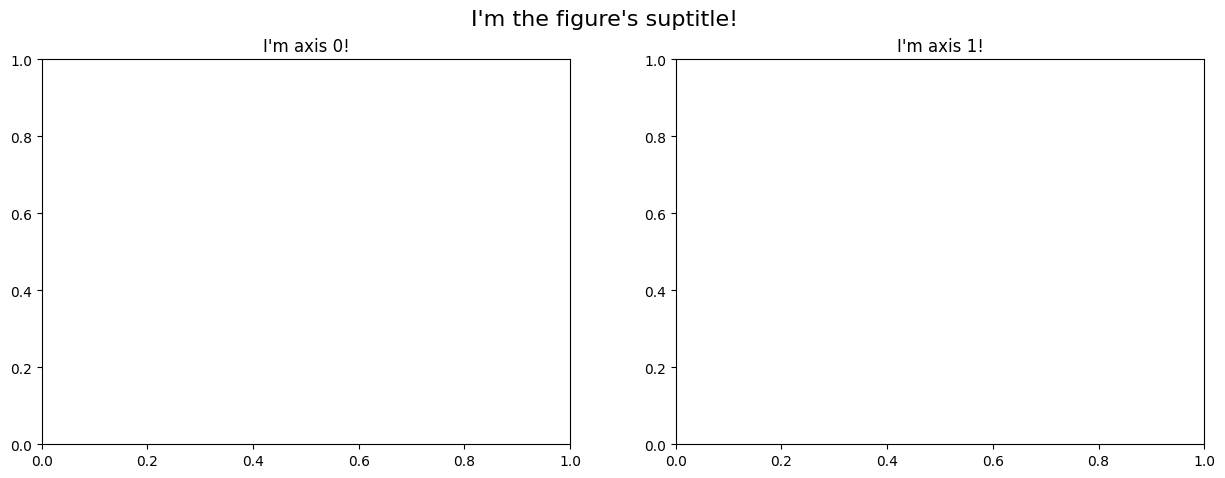

In [4]:
f, axes = plt.subplots(
    1,  # number of rows
    2,  # number of columns
    figsize=[15, 5],
    sharex=True,
    sharey=False
)
axtxt0 = axes[0].set(title="I'm axis 0!")
axtxt1 = axes[1].set(title="I'm axis 1!")

suptitle = f.suptitle("I'm the figure's suptitle!", fontsize=16)

### Looping through a flattened array of axes

Often the array of axes is 2D, making looping annoying.

Luckily you can use the array's `.ravel` method to flatten it.

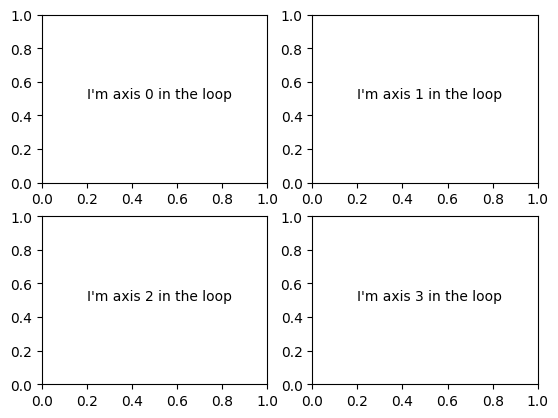

In [5]:
f, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.ravel()):
    pos = ax.get_position()
    ax.text(0.2, 0.5, f"I'm axis {i} in the loop")

## Making plots

This is the easy bit, and also the bit where you can most often substitute another plotting package.

Most plotting methods return something and it's often useful to put the return value in a variable. Also this stops annoying text showing up in your jupyter notebook. 

Some useful keyword arguments that several plotting methods accept:

* [`zorder`](https://matplotlib.org/3.1.1/gallery/misc/zorder_demo.html): control layering
* `alpha`: set transparency
* `markersize`: how big are the markers (sometimes you need to use `s` instead)
* `linestyle`: for dotted lines
* `marker`: for crosses, triangles, stars etc

The plotting methods I've used most:

* [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)
* [`bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)
* [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html)
* [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)
* [`axvline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html) (also axhline)
* [`vlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.vlines.html) (also hlines)
* [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html) (In my experience this is the easiest way to shade a region)


Some things about colours:

* Names of colours in the standard colormap start with `"tab:"`, for example `"tab:blue"`.
* The standard colour map aims to make different colours easy to tell apart: it doesn't convey quantities. 
* My favourite quantitative colour map is viridis.
* If you use a quantitative colour map, you may also want a [colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).

### Adding text

The main point of any visualisation is to tell a story. A good way to tell a story is with text! 

In my opinion adding more text is almost always a good idea. It is also something matplotlib is pretty good at.

The main functions are [`matplotlib.axes.Axes.text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html) (for putting some text at a spot) and [`matplotlib.axes.Axes.annotate`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html) (for text with arrows).

You can add latex using dollar signs.

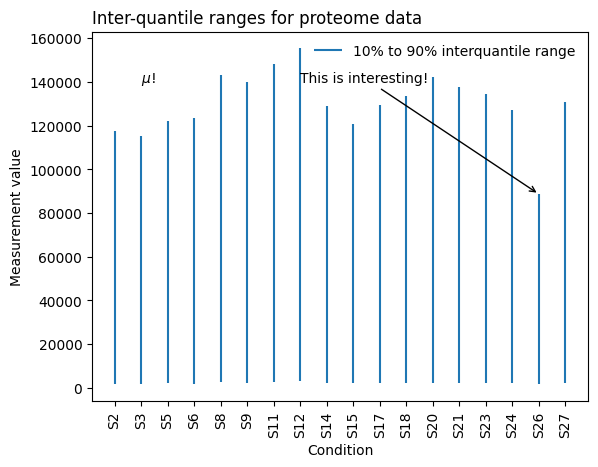

In [6]:
qs = proteome_data[numeric_proteome_columns].quantile([0.1, 0.9]).T
x = pd.Series(np.linspace(0, 1, len(qs)), index=qs.index)

f, ax = plt.subplots()
vlines = ax.vlines(x, qs[0.1], qs[0.9])
xticks = ax.set_xticks(x)
annotation = ax.annotate(
    "This is interesting!", 
    xy=(x["S26"], qs.loc["S26", 0.9]), 
    xytext=(x["S12"], 140000),
    arrowprops={"arrowstyle": "->"}
)
text = ax.text(x["S3"], 140000, "$\mu$!")
xticklabels = ax.set_xticklabels(qs.index, rotation=90)
txt = ax.set(xlabel="Condition", ylabel="Measurement value")
title = ax.set_title("Inter-quantile ranges for proteome data", loc="left")
legend = ax.legend([vlines], ["10% to 90% interquantile range"], frameon=False, loc="upper right")

### Zipping axes with 

Often when looping through an array of `Axes` objects you want to plot different data in each one.

The Python standard library's [`zip`](https://docs.python.org/3/library/functions.html#zip) function is very useful for this. It takes in arbitrarily many iterable objects and returns an iterator of tuples with one member from each input.

Note that, in the example below, the `zip` pattern works even though `axes.ravel()` and `numeric_transcriptome_columns` have different numbers of elements.

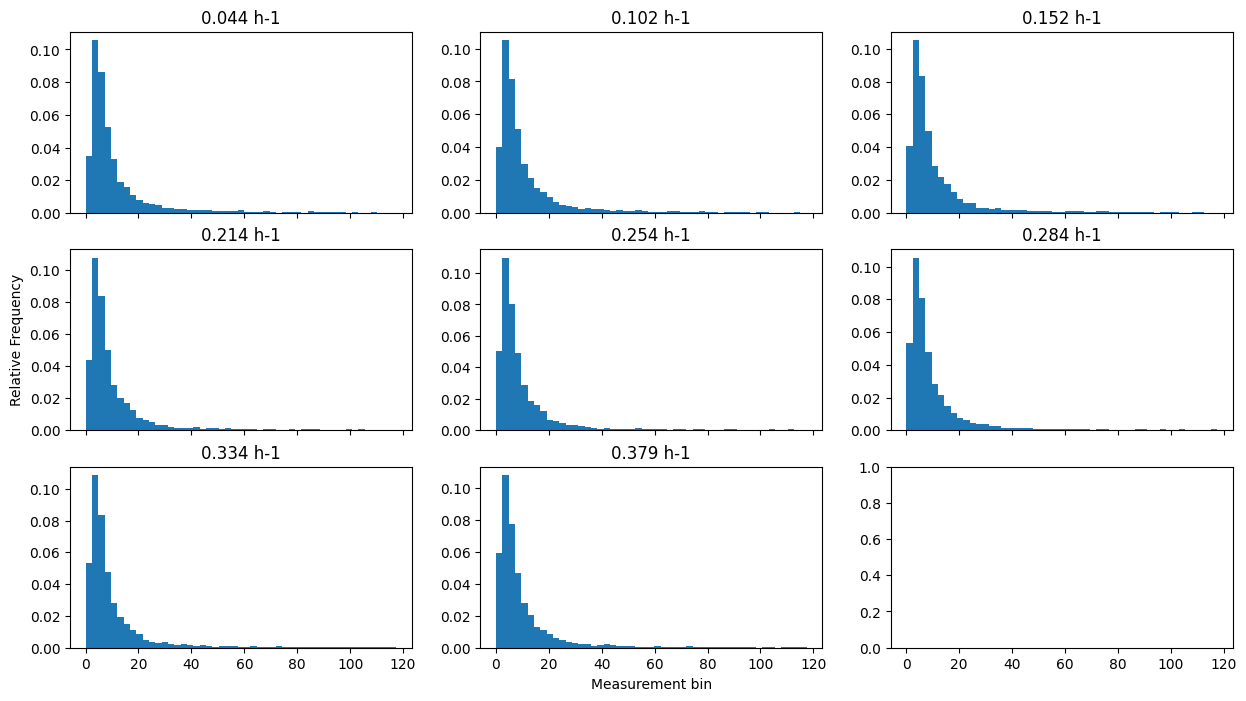

In [7]:
# Get smallest square containing this many elements
n_histograms = len(numeric_transcriptome_columns)
grid_size = int(np.ceil(np.sqrt(n_histograms)))

# Use 99% quantile of the whole dataset to make histogram bins
high = transcriptome_data[numeric_transcriptome_columns].stack().quantile(0.99)
bins = np.linspace(0, high, 50)

f, axes = plt.subplots(grid_size, grid_size, figsize=[15, 8], sharex=True)

# The zip bit!
for col, ax in zip(numeric_transcriptome_columns, axes.ravel()):
    hist = ax.hist(transcriptome_data[col], density=True, bins=bins)
    title = ax.set_title(col)

ylabel = axes[1, 0].set_ylabel("Relative Frequency")
xlabel = axes[2, 1].set_xlabel("Measurement bin")

### Plotting on logarithmic scale

Positive-constrained data very often looks better when plotted on logarithmic scale.

Matplotlib lets you do this without explicitly creating the log-scaled data using [`pyplot.semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html) and [`matplotlib.axes.Axes.semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogx.html) (and `semilogy` of course!).

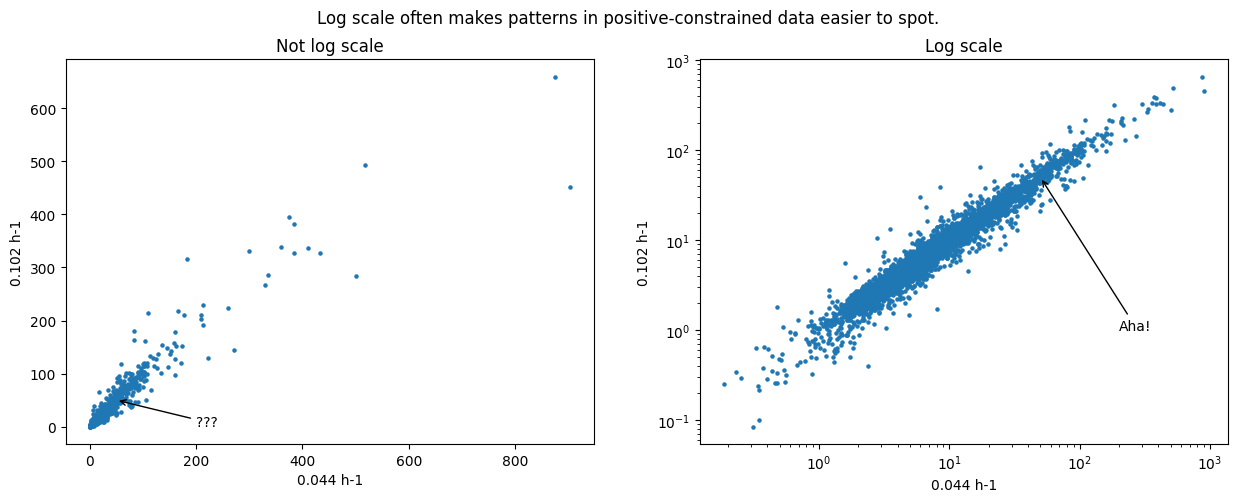

In [8]:
names = ["a", "b", "c"]
times = [0.1, 1, 10, 100, 1000, 10000]
timecourses = [np.linspace(0, 6, 6) * np.exp(np.random.normal(size=6)) for _ in range(len(names))]

df = pd.DataFrame.from_records(
    {name: timecourse for name, timecourse in zip(names, timecourses)}, 
    index=times
)

f, axes = plt.subplots(1, 2, figsize=[15, 5])
for ax, title, annotation in zip(axes, ["Not log scale", "Log scale"], ["???", "Aha!"]):
    ax.scatter(
        transcriptome_data[numeric_transcriptome_columns[0]], 
        transcriptome_data[numeric_transcriptome_columns[1]],
        s=5
    )
    ax.annotate(
        annotation,
        xy=(50, 50), 
        xytext=(200, 1), 
        arrowprops=dict(arrowstyle="->",)
    )
    ax.set(
        title=title, 
        xlabel=numeric_transcriptome_columns[0], 
        ylabel=numeric_transcriptome_columns[1]
    )
    
_ = axes[1].semilogx()
_ = axes[1].semilogy()


suptitle = f.suptitle("Log scale often makes patterns in positive-constrained data easier to spot.")

### Time series

Times that are stored as seconds or milliseconds can be difficult to read in graphs.

To solve this problem matplotlib provides [`matplotlib.dates.DataFormatter`](https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.DateFormatter). 

Here is how to use it.

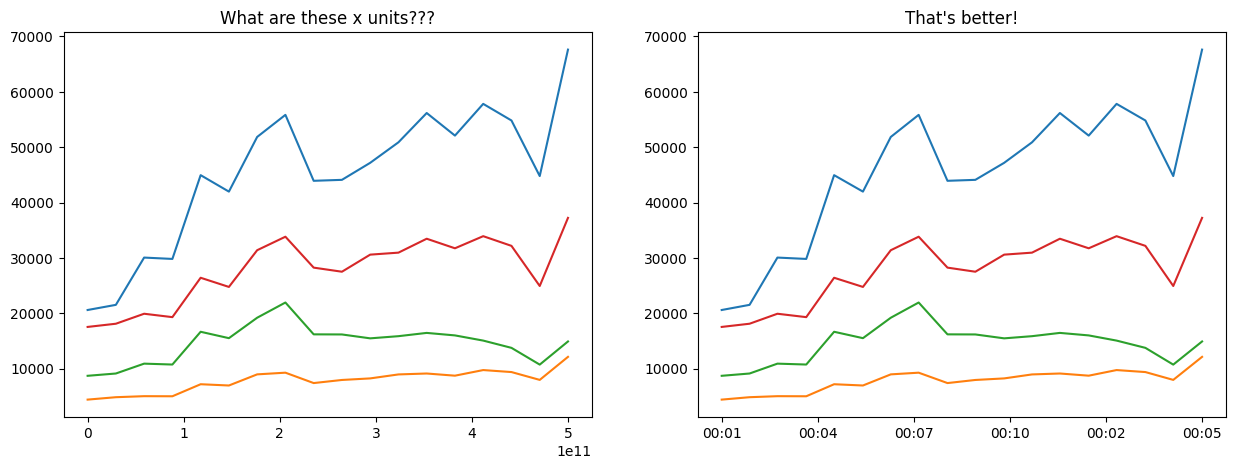

In [9]:
df = proteome_data[numeric_proteome_columns].iloc[5:9].T
df.index = pd.TimedeltaIndex(np.linspace(0, 500, len(df)), unit="s")


f, axes = plt.subplots(1, 2, figsize=[15, 5])
plt0 = axes[0].plot(df)
txt0 = axes[0].set_title("What are these x units???")

plt1 = axes[1].plot(df.index.seconds, df.values)
axes[1].xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%m'))
txt1 = axes[1].set_title("That's better!")


### Get the current figure or axis

So far we have mostly been accessing `matplotlib.figure.Figure`s and `matplotlib.axes.Axes`s by taking advantage of the fact that they are returned by pyplot functions.

This doesn't work when a function creates matplotlib objects but doesn't return them in a straightforward way. For example, an external package might return a [`matplotlib.gridspec.GridSpec`](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) object rather than a `Figure` or `Axes`.

In this case you can still access the  for this are [`pyplot.gcf`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gcf.html) and [`pyplot.gca`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html).

They are super handy for using matplotlib on outputs of packages with matplotlib backends.

Also useful: `pyplot.gcf().axes`: this returns the axes of the current figure in an array.

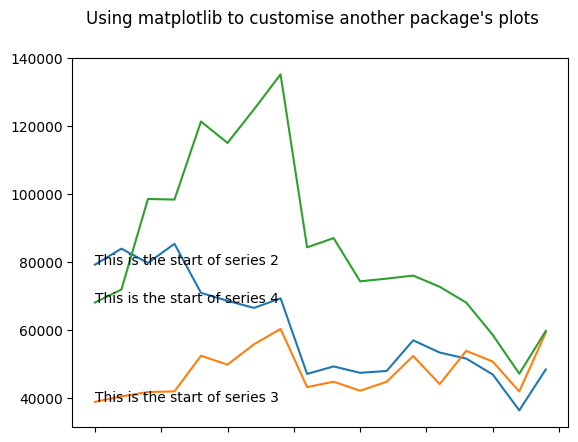

In [10]:
df = proteome_data[numeric_proteome_columns].iloc[1:4].T

for name, s in df.items():
    i_dont_know_what_this_is_but_some_plotting_happened = s.plot()
    ax = plt.gca()
    ax.text(0, s.iloc[0], f"This is the start of series {name}")
    ax.set_xticklabels([])
    

f = plt.gcf()
suptitle = f.suptitle("Using matplotlib to customise another package's plots")

## Styles

In my opinion most matplotlib defaults are fine, but there are alternatives!

You can see all available styles by checking `plt.style.available` and use them by running `plt.style.use("my_style")`. 

[Here](https://matplotlib.org/stable/gallery/style_sheets/index.html) is the relevant documentation page.

You can [write your own style sheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html#defining-your-own-style).

You can use multiple styles at once: `plt.style.use(["style1", "style2"])`.

Warning: running `plt.style.use` multiple times will compose styles, not cancel the previous style (except for the `default` style).

In [11]:
print(", ".join(plt.style.available))

Solarize_Light2, _classic_test_patch, _mpl-gallery, _mpl-gallery-nogrid, bmh, classic, cmap-cividis, cmap-inferno, cmap-magma, cmap-plasma, cmap-viridis, colors10, colors10-ls, colors10-markers, colors5, colors5-light, colorsblind10, colorsblind34, dark_background, fast, fivethirtyeight, ggplot, grayscale, ipynb, ls5, marker7, nature, seaborn-v0_8, seaborn-v0_8-bright, seaborn-v0_8-colorblind, seaborn-v0_8-dark, seaborn-v0_8-dark-palette, seaborn-v0_8-darkgrid, seaborn-v0_8-deep, seaborn-v0_8-muted, seaborn-v0_8-notebook, seaborn-v0_8-paper, seaborn-v0_8-pastel, seaborn-v0_8-poster, seaborn-v0_8-talk, seaborn-v0_8-ticks, seaborn-v0_8-white, seaborn-v0_8-whitegrid, svg_no_fonttype, tableau-colorblind10, use_mathtext, use_tex


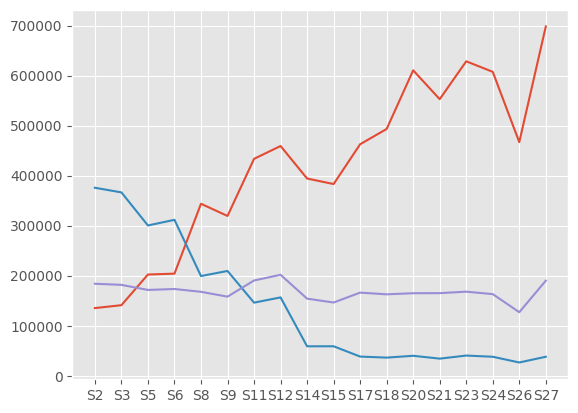

In [12]:
plt.style.use("ggplot")

df = proteome_data[numeric_proteome_columns].iloc[12:15].T

lines = plt.plot(df)

To go back to the default style, run `plt.style.use("default")`.

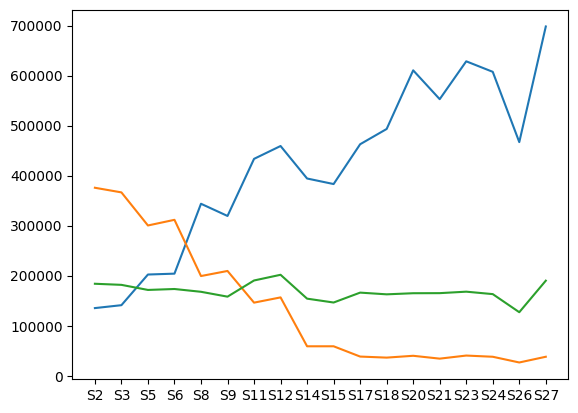

In [13]:
plt.style.use('default')

lines = plt.plot(df)

## Some opinions about plotting

Un-summarised data is generally easier to understand. When aggregation is necessary it is best done simply using e.g. bin counts, quantiles or sums. Smoothed or interpolated data is often misleading!

Viridis is a nice colour map

To make your graph look very professional, use the colour grey.